# Scraping 실습

## request package

In [ ]:
!conda install requests

In [2]:
import requests

In [3]:
def getDownload( url, param = None, retries = 3 ):
    resp = None
    
    try:
        resp = requests.get( url, params = param ) #, headers = header )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, param, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    
    return resp

In [4]:
url = 'http://www.crawler-test.com/status_codes/status_100'
getDownload( url )

408
REQUEST_TIMEOUT
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


<Response [408]>

In [5]:
url = 'http://www.crawler-test.com/status_codes/status_200'
getDownload( url )

<Response [200]>

In [6]:
url = 'http://www.crawler-test.com/status_codes/status_300'
getDownload( url )

404
Not Found
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


<Response [404]>

In [7]:
url = 'http://www.crawler-test.com/status_codes/status_400'
getDownload( url )

400
Bad Request
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


<Response [400]>

In [8]:
url = 'http://www.crawler-test.com/status_codes/status_500'
getDownload( url )

Retries : 3
Retries : 2
Retries : 1
500
Internal Server Error
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


<Response [500]>

In [17]:
def postDownload( url, data = None, param = None, retries = 3 ):
    resp = None
    
    try:
        resp = requests.post( url, data = data, params = param ) #, headers = header )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, data, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    
    return resp

In [18]:
url = 'http://pythonscraping.com/pages/files/processing.php' 
data = { 'firstname':'테스트', 'lastname':1234 }

In [19]:
html = postDownload( url, data )

print( html.request.body )
print( html.request.headers )

html.text

firstname=%ED%85%8C%EC%8A%A4%ED%8A%B8&lastname=1234
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '51', 'Content-Type': 'application/x-www-form-urlencoded'}


'Hello there, 테스트 1234!'

## Cookie

In [20]:
def postDownloadCookie( url, data = None, param = None, cookie = None, retries = 3 ):
    resp = None
    
    try:
        resp = requests.post( url, data = data, cookies = cookie , params = param ) #, headers = header )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, data, cookie, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    
    return resp

In [21]:
url = 'http://pythonscraping.com/pages/cookies/login.php'
data = { 'username':'test', 'password':'password' }

In [22]:
html = postDownload( url, data )
cookie = html.cookies.get_dict()

html = requests.post( url, cookies = cookie )
html.text

404
Not Found
{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '31', 'Content-Type': 'application/x-www-form-urlencoded'}


'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr"\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta charset="utf-8" />\n<link rel="shortcut icon" href="http://pythonscraping.com/misc/favicon.ico" type="image/vnd.microsoft.icon" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta name="MobileOptimized" content="width" />\n<meta name="Generator" content="Drupal 7 (http://drupal.org)" />

In [23]:
session = requests.Session()
data = { 'username':'test', 'password':'password' }

html = session.post( url, data )

html = session.post( url )
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr"\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta charset="utf-8" />\n<link rel="shortcut icon" href="http://pythonscraping.com/misc/favicon.ico" type="image/vnd.microsoft.icon" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta name="MobileOptimized" content="width" />\n<meta name="Generator" content="Drupal 7 (http://drupal.org)" />

## HTML - BeautifulSoup

In [28]:
!conda install beautifulsoup4

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [9]:
from bs4 import BeautifulSoup

In [10]:
html = '''
<!DOCTYPE html>
<html>
    <head>
        <meta charset="utf-8">
        <title>Beautiful Soup Training</title>
    </head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red">Go to page1</a>
                <a class="blue">Go to page2</a>
                <b class="green">Go to page3</a>
                <a class="red">Go to page4</a>
                <c class="yellow">Go to page4</a>
                <d id="gray">Go to page5</a>
                <e id="red">Go to page6</a>
            </p>
        </div>
    </body>
</html>
'''

In [11]:
dom = BeautifulSoup( html, "lxml" )

In [12]:
dom

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<title>Beautiful Soup Training</title>
</head>
<body>
<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3
                <a class="red">Go to page4</a>
<c class="yellow">Go to page4
                <d id="gray">Go to page5
                <e id="red">Go to page6
            </e></d></c></b></p>
</div>
</body>
</html>

### find() / find_all() - tag

In [65]:
dom.find( 'a' )

<a class="red">Go to page1</a>

In [66]:
dom.find_all( 'a' )

[<a class="red">Go to page1</a>,
 <a class="blue">Go to page2</a>,
 <a class="red">Go to page4</a>]

### find() / find_all() - attribute

In [67]:
dom.find( '', { "id":"result" } )

<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3
                <a class="red">Go to page4</a>
<c class="yellow">Go to page4
                <d id="gray">Go to page5
                <e id="red">Go to page6
            </e></d></c></b></p>
</div>

In [68]:
dom.find_all( '', { 'id':'result' } )

[<div id="result">
 <p class="row">
 <a class="red">Go to page1</a>
 <a class="blue">Go to page2</a>
 <b class="green">Go to page3
                 <a class="red">Go to page4</a>
 <c class="yellow">Go to page4
                 <d id="gray">Go to page5
                 <e id="red">Go to page6
             </e></d></c></b></p>
 </div>]

In [69]:
dom.find( '', { 'class':'red' } )

<a class="red">Go to page1</a>

In [70]:
dom.find_all( '', { 'class':'red' } )

[<a class="red">Go to page1</a>, <a class="red">Go to page4</a>]

### find() / find_all() - keyword

In [71]:
dom.find( id = 'result' )

<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3
                <a class="red">Go to page4</a>
<c class="yellow">Go to page4
                <d id="gray">Go to page5
                <e id="red">Go to page6
            </e></d></c></b></p>
</div>

In [72]:
dom.find_all( id = 'result' )

[<div id="result">
 <p class="row">
 <a class="red">Go to page1</a>
 <a class="blue">Go to page2</a>
 <b class="green">Go to page3
                 <a class="red">Go to page4</a>
 <c class="yellow">Go to page4
                 <d id="gray">Go to page5
                 <e id="red">Go to page6
             </e></d></c></b></p>
 </div>]

## HTML - BeautifulSoup Training

In [73]:
url = "http://pythonscraping.com/pages/page3.html"
html = getDownload( url )
html.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [75]:
dom = BeautifulSoup( html.text, 'lxml' )
dom

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

### id = 'footer' -> div tag

In [76]:
footer = dom.find( 'div', { 'id':'footer' } )
footer

<div id="footer">
© Totally Normal Gifts, Inc. <br/>
+234 (617) 863-0736
</div>

In [77]:
parent = footer.find_parent()
parent.name, parent.attrs

('div', {'id': 'wrapper'})

In [78]:
children = parent.find_all( recursive = False )
for row in children:
    print( row.name, row.attrs )

img {'src': '../img/gifts/logo.jpg', 'style': 'float:left;'}
h1 {}
div {'id': 'content'}
table {'id': 'giftList'}
div {'id': 'footer'}


In [79]:
aList = dom.find_all( 'tr' )
for row in aList:
    print( row.find_all( recursive = False )[ 2 ].text.strip() )

Cost
$15.00
$10,000.52
$10,005.00
$0.50
$1.50


'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>파이썬 - Google 검색</title><script nonce="/S7lQX/xcDUXON1YUwogiw==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};g
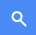
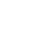
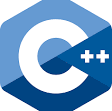
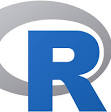
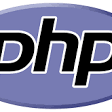

In [105]:
url = 'https://www.google.co.kr/search'
html = getDownload( url, param = { 'q':'파이썬' } )
html.text

<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>파이썬 - Google 검색</title><script nonce="/S7lQX/xcDUXON1YUwogiw==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};g
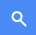
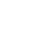
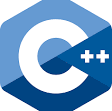
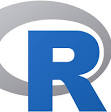
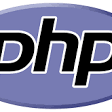

In [106]:
dom = BeautifulSoup( html.text, 'lxml' )
dom

In [107]:
dom.find_all( '', { 'class':'r' } )

[]

In [108]:
for tag in dom.find_all( '', { 'class':'r' } ):
    print( tag.find( 'h3' ).text )

In [109]:
import urllib.request
import urllib.parse

In [110]:
with urllib.request.urlopen( url ) as response:
    html = response.read()
    dom = BeautifulSoup( html, 'lxml' )

In [111]:
dom

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script nonce="9yc8yE0vcQa+g7EI4TcBlA==">(function(){window.google={kEI:'Htw4Xt3QEIr6-Qa2gY2wBQ',kEXPI:'0,1353747,5662,731,31,192,756,4348,207,2414,540,250,10,1051,175,352,12,1366,69,4,60,690,52,75,383,615,101,133,155,157,1128210,1197719,430,28,329090,1294,12383,4855,32692,15247,867,28684,363,8825,8384,4859,1361,283,4040,4968,3024,12385,3386,1,1812,1976,2044,8909,5297,2054,920,873,1217,1710,1,1264,6430,7432,3874,2883,21,318,1981,2535,2778,520,399,2277,8,2796,218,595,780,1279,390,1822,202,328,149,1103,840,517,1474,48,820,3438,109,151,52,1137,2,2063,606,1839,184,1777,520,259,1688,747,429,44,1009,93,328,1284,16,84,419,2424,2247,473,1339,748,208,831,3227,1714,1131,7,437,883,6313,6513,1831,1001,472,426,981,1043,375,2083,105

In [112]:
dom.find_all( '', { 'class':'r' } )

[]

In [113]:
for tag in dom.find_all( '', { 'class':'r' } ):
    print( tag.find( 'h3' ).text )

In [120]:
html = '''
<!DOCTYPE html>
<html>
    <head>
        <meta charset="utf-8">
        <title>Beautiful Soup Training</title>
    </head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red">Go to page1</a>
                <a class="blue">Go to page2</a>
                <b class="green">Go to page3</a>
                <a class="red">Go to page4</a>
                <c class="yellow">Go to page4</a>
                <d id="gray">Go to page5</a>
                <e id="gray">Go to page6</a>
            </p>
        </div>
    </body>
</html>
'''

In [121]:
dom = BeautifulSoup( html, 'html.parser' )
dom


<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Beautiful Soup Training</title>
</head>
<body>
<div id="result">
<p class="row">
<a class="red">Go to page1</a>
<a class="blue">Go to page2</a>
<b class="green">Go to page3</b></p></div></body></html>
<a class="red">Go to page4</a>
<c class="yellow">Go to page4</c>
<d id="gray">Go to page5</d>
<e id="gray">Go to page6</e>





In [122]:
dom.select_one( 'a' )

<a class="red">Go to page1</a>

In [123]:
dom.select( 'a' )

[<a class="red">Go to page1</a>,
 <a class="blue">Go to page2</a>,
 <a class="red">Go to page4</a>]

In [124]:
dom.select_one( '#gray' )

<d id="gray">Go to page5</d>

In [125]:
dom.select( '#gray' )

[<d id="gray">Go to page5</d>, <e id="gray">Go to page6</e>]

In [126]:
dom.select_one( '.red' )

<a class="red">Go to page1</a>

In [127]:
dom.select( '.red' )

[<a class="red">Go to page1</a>, <a class="red">Go to page4</a>]

In [128]:
dom.select_one( '#result .row a' )

<a class="red">Go to page1</a>

In [129]:
dom.select( '#result .row a' )

[<a class="red">Go to page1</a>, <a class="blue">Go to page2</a>]

<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>파이썬 - Google 검색</title><script nonce="sHf0hyVvHDzf0KzzCuP2og==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};g
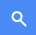
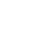
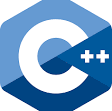
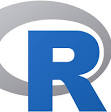
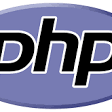

In [135]:
url = 'https://www.google.co.kr/search'
html = getDownload( url, param = { 'q':'파이썬' } )
dom = BeautifulSoup( html.text, 'lxml' )
dom

In [136]:
dom.select( '.r' )

[]

In [137]:
for tag in dom.select( '.r' ):
    print( tag.find( 'h3' ).text )

## Selenium WebDriver

In [ ]:
!conda install selenium

In [15]:
from selenium import webdriver

In [20]:
#path = 'D:/Anaconda3/chromedriver.exe'                # windows
path = '/Users/wolee-mac/WorkSpace/chromedriver'       # mac
driver = webdriver.Chrome( path )

In [21]:
url = 'http://example.webscraping.com/places/default/search'
driver.get( url )

In [22]:
driver.find_element_by_id( "search_term" ).clear()

In [23]:
driver.find_element_by_id( "search_term" ).send_keys( 'korea' )

In [24]:
driver.find_element_by_id( 'search' ).click()

In [25]:
results = driver.find_element_by_id( 'results' )
for tag in results.find_elements_by_tag_name( 'a' ):
    print( tag.text )
    print( tag.get_attribute( 'href' ) )

North Korea
http://example.webscraping.com/places/default/view/North-Korea-165
South Korea
http://example.webscraping.com/places/default/view/South-Korea-211


### CSS Selector를 이용

In [12]:
results = driver.find_elements_by_css_selector( '#results a' )
for tag in results:
    print( tag.text )
    print( tag.get_attribute( 'href' ) )

North Korea
http://example.webscraping.com/places/default/view/North-Korea-165
South Korea
http://example.webscraping.com/places/default/view/South-Korea-211


### XPath 사용

In [14]:
results = driver.find_element_by_xpath( '//div[@id="results"]' )
for tag in results.find_elements_by_xpath( './/a' ):
    print( tag.text )
    print( tag.get_attribute( 'href' ) )

North Korea
http://example.webscraping.com/places/default/view/North-Korea-165
South Korea
http://example.webscraping.com/places/default/view/South-Korea-211


### 조건식을 통한 결과 획득

In [21]:
import re

for tag in result[ "records" ]:
    print( tag[ "pretty_link" ] )
    print( re.findall( r"<a href=\">", tag[ "pretty_link" ] ) )
    print( re.findall( r"<div>(.+)</div>", tag[ "pretty_link" ] ) )
    
print( re.findall( r"<a href=\"(.+)\">", result[ "records" ][ 0 ][ "pretty_link" ] ) )

TypeError: 'WebElement' object is not subscriptable

## Crawler 만들기

### naver 가장 많이 본 뉴스 crawling

In [39]:
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
import requests
import re

In [40]:
NEWS_PATH = "./news/"  # text file 저장 directory
NAVER_NEWSNOW_URL = "https://news.naver.com"  # crawling 대상 site

In [ ]:
# 웹 문서 리스트 가져오기 함수

In [44]:
def get_news_list():
    newslist_html = requests.get( url = NAVER_NEWSNOW_URL ).content
    newslist_lxml = BeautifulSoup( newslist_html, 'lxml', from_encoding = 'utf-8' )
    newslist = [ i.get( 'href' ) for i in newslist_lxml.select( 'ul.section_list_ranking li a' ) ]
    print( newslist )
    
    return newslist

In [38]:
print( requests.get( url = NAVER_NEWSNOW_URL ).content )

b'\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\t\t\n\t\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<meta http-equiv="refresh" content="600" />\n<meta name="viewport" content="width=1106" />\n\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n<meta property="og:title"       content="\xb3\xd7\xc0\xcc\xb9\xf6 \xb4\xba\xbd\xba">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="http://news.naver.com/main/home.nhn">\r\n<meta property="og:image"       content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png"/>\r\n<meta property="og:description" content="\xc1\xa4\xc4\xa1, \xb0\xe6\xc1\xa6, \xbb\xe7\xc8\xb8, \xbb\xfd\xc8\xb0/\xb9\xae\xc8\xad, \xbc\xbc\xb0\xe8, IT/\xb0\xfa\xc7\xd0 \xb5\xee \xbe\xf0\xb7\

In [33]:
newslist_lxml = BeautifulSoup( requests.get( url = NAVER_NEWSNOW_URL ).content, 'lxml', from_encoding = 'utf-8' )
newslist = [ i.get( 'href' ) for i in newslist_lxml.select( 'ul.section_list_ranking li a' ) ]
print( newslist )

['/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=001&aid=0011391028&date=20200210&type=1&rankingSeq=1&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=025&aid=0002974313&date=20200210&type=1&rankingSeq=2&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=005&aid=0001286748&date=20200210&type=1&rankingSeq=3&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=023&aid=0003506669&date=20200210&type=1&rankingSeq=4&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=015&aid=0004287435&date=20200210&type=1&rankingSeq=5&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=018&aid=0004572587&date=20200210&type=1&rankingSeq=6&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=437&aid=0000230777&date=20200210&type=2&rankingSeq=7&ranking

In [45]:
print( get_news_list() )

['/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=001&aid=0011391028&date=20200210&type=1&rankingSeq=1&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=025&aid=0002974313&date=20200210&type=1&rankingSeq=2&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=005&aid=0001286748&date=20200210&type=1&rankingSeq=3&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=023&aid=0003506669&date=20200210&type=1&rankingSeq=4&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=015&aid=0004287435&date=20200210&type=1&rankingSeq=5&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=018&aid=0004572587&date=20200210&type=1&rankingSeq=6&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=437&aid=0000230777&date=20200210&type=2&rankingSeq=7&ranking

In [ ]:
# news 콘텐츠 가져오기 함수

In [46]:
def get_news_content( news_url ):
    news_id = ''
    newscontent_text = ''
    url_params = urlparse( news_url )
    url_params = parse_qs( url_params.query )
    news_id = url_params[ 'aid' ]
    
    newscontent_html = requests.get( NAVER_NEWSNOW_URL + news_url ).content
    newscontent_lxml = BeautifulSoup( newscontent_html, 'lxml', from_encoding = 'utf-8' )
    
    newscontent_head = newscontent_lxml.select( '#articleTitle' )
    newscontent_list = newscontent_lxml.select( '#articleBodyContents')
    
    if not newscontent_head:
        newscontent_head = newscontent_lxml.select( '.end_tit' )
    
    if not newscontent_list:
        newscontent_list = newscontent_lxml.select( '#articleBody' )
        
    newscontent_text += str( newscontent_head[ 0 ].find_all( text = True ) )
    newscontent_text += str( newscontent_list[ 0 ].find_all( text = True ) )
    
    save_file( NEWS_PATH + str( news_id[ 0 ] ) + '.txt', newscontent_text )

In [ ]:
# 콘텐츠 가져와서 저장/ 저장 파일 읽기 함수

In [47]:
def save_file( filename, text ):
    news_file = open( filename, 'w', encoding = 'utf-8' )
    news_file.write( text )
    news_file.close()
    
def open_file( file ):
    news_file = open( file, 'r', encoding = 'utf-8' )
    content = news_file.read()
    news_file.close()
    
    return content

In [ ]:
# Naver 가장 많이 본 뉴스 제목 가져오기

In [49]:
news_list = get_news_list()
for news_url in news_list:
    get_news_content( news_url )

['/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=022&aid=0003437287&date=20200210&type=1&rankingSeq=1&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=469&aid=0000465627&date=20200210&type=1&rankingSeq=2&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=277&aid=0004621757&date=20200210&type=0&rankingSeq=3&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=023&aid=0003506678&date=20200210&type=1&rankingSeq=4&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=018&aid=0004572761&date=20200210&type=1&rankingSeq=5&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=003&aid=0009695081&date=20200210&type=1&rankingSeq=6&rankingSectionId=100', '/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=025&aid=0002974313&date=20200210&type=1&rankingSeq=7&ranking